In [1]:
!pip install numpy==2.2.0
!pip install pandas==2.2.3
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3

   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   -- ------------------------------------- 0.8/12.6 MB 4.6 MB/s eta 0:00:03
   --- ------------------------------------ 1.0/12.6 MB 4.9 MB/s eta 0:00:03
   ------ --------------------------------- 2.1/12.6 MB 3.8 MB/s eta 0:00:03
   ------ --------------------------------- 2.1/12.6 MB 3.8 MB/s eta 0:00:03
   --------- ------------------------------ 3.1/12.6 MB 3.4 MB/s eta 0:00:03
   ------------- -------------------------- 4.2/12.6 MB 3.5 MB/s eta 0:00:03
   -------------- ------------------------- 4.5/12.6 MB 3.1 MB/s eta 0:00:03
   ---------------- ----------------------- 5.2/12.6 MB 3.5 MB/s eta 0:00:03
   ------------------- -------------------- 6.3/12.6 MB 3.4 MB/s eta 0:00:02
   ----------------------- ---------------- 7.3/12.6 MB 3.6 MB/s eta 0:00:02
   ------------------------- -------------- 8.1/12.6 MB 3.6 MB/s eta 0:00:02
   -------------------------- ------------- 8.4/12.6 MB 3.7 MB/s eta 0:00:02
   ---

# Import Libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#Load Data

In [3]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df=pd.read_csv(url)

In [4]:
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
848,2014,NISSAN,MAXIMA,MID-SIZE,3.5,6,AV,Z,12.3,9.1,10.9,26,251
233,2014,CHEVROLET,MALIBU,MID-SIZE,2.0,4,AS6,Z,11.5,7.9,9.9,29,228
874,2014,PORSCHE,911 CARRERA 4S CABRIOLET,MINICOMPACT,3.8,6,M7,Z,12.9,9.1,11.2,25,258
957,2014,SUBARU,LEGACY AWD,MID-SIZE,3.6,6,AS5,X,13.3,9.5,11.6,24,267
20,2014,AUDI,A4 QUATTRO,COMPACT,2.0,4,AS8,Z,11.5,8.1,10.0,28,230


#Explore Data

In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


MODELYEAR has 0 standard deviation, no interesting information content.


In [6]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

# Feature Selection

Select a few features that might be indicative of CO2 emission to explore more.

In [9]:
cdf = df[['ENGINESIZE', 'CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.sample(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
21,2.0,4,9.3,214
262,5.3,8,18.4,294
501,3.5,6,13.4,308
689,3.0,6,12.7,292
921,3.6,6,15.9,254


#Feature Visualization

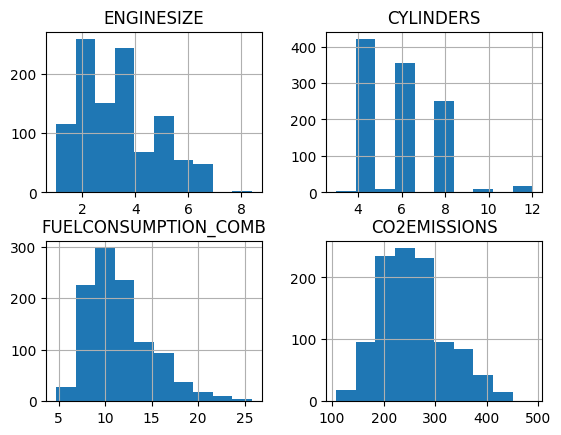

In [14]:
viz = cdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

Most engines have 4,6, or 8 cylinders, and engine sizes between 2-4 liters.

#Scatter plot

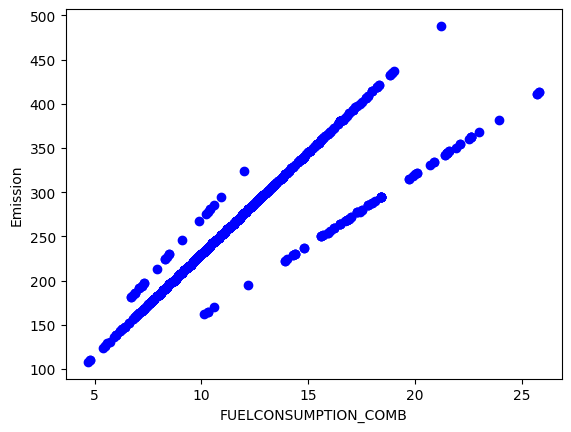

In [15]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

Three car groups each have a strong linear relationship between their combined fuel consumption and their CO2 emissions. Their intercepts are similar.

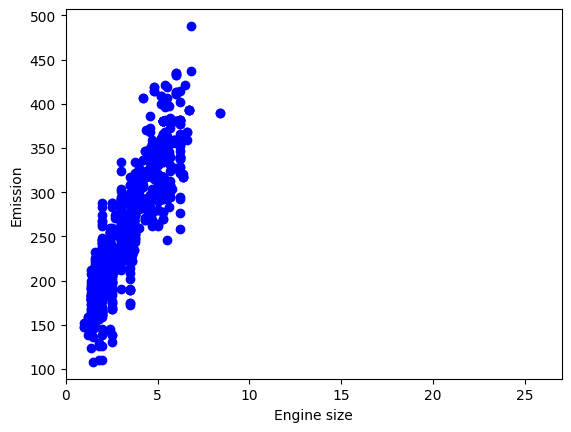

In [17]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.xlim(0,27) #same x-axis limit as FUELCONSUMPTION_COMB
plt.show()

Relationship between engine size and CO2 emission is quite linear, but correlation weaker as compared to FUELCONSUMPTION_COMB scatter plot.

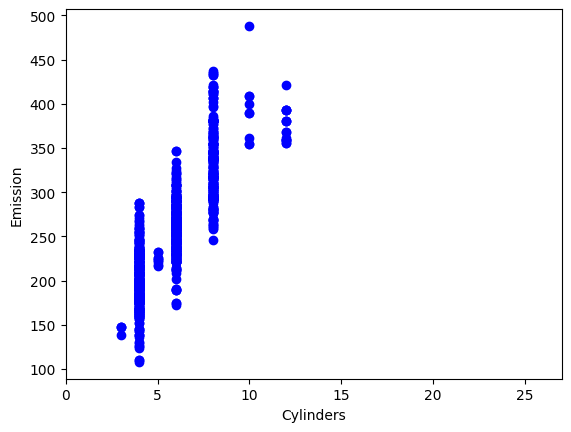

In [20]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.xlim(0,27) #same x-axis limit as FUELCONSUMPTION_COMB
plt.show()

#Extract input feature and labels from dataset

##ENGINESIZE

In [21]:
X=cdf.ENGINESIZE.to_numpy()
y=cdf.CO2EMISSIONS.to_numpy()

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
type(X_train), type(X_test), type(y_train), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [24]:
np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test)

((853,), (214,), (853,), (214,))

##Build Simple Linear Regression Model (on Train data)

In [31]:
from sklearn import linear_model

#create model object
regressor = linear_model.LinearRegression()

#train model on training data
regressor.fit(X_train.reshape(-1,1), y_train)

#print coefficients
print('Coefficients: ', regressor.coef_[0]) #simple linear regression only one coefficient
print('Intercept: ',regressor.intercept_)

Coefficients:  38.99297872443403
Intercept:  126.28970217408735


##Visualization

y = coefficient*x + intercept

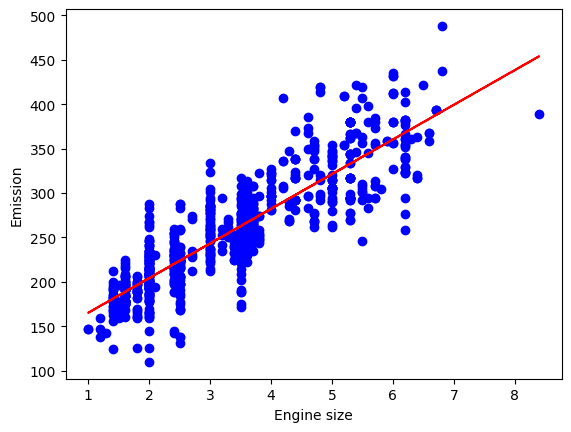

In [33]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, regressor.coef_[0]*X_train + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

##Model Evaluation

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#predict on test data
y_pred = regressor.predict(X_test.reshape(-1,1))

print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_pred))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2-score: %.2f" % r2_score(y_test, y_pred))

Mean absolute error: 24.10
Mean squared error: 985.94
Root mean squared error: 31.40
R2-score: 0.76


## Visualization (On Test data)

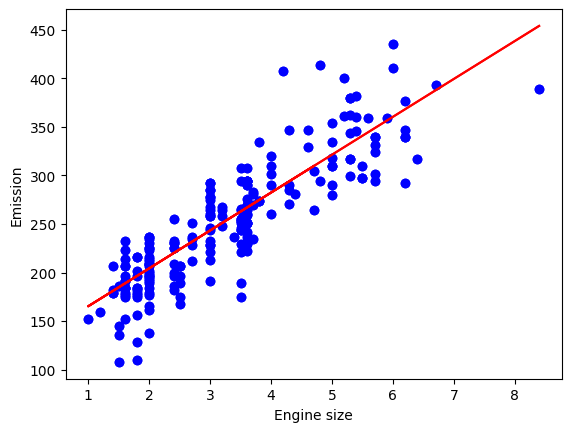

In [37]:
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, regressor.coef_[0]*X_test + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Try feature 2: FUELCONSUMPTION_COMB

In [38]:
X=cdf.ENGINESIZE.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
model2 = linear_model.LinearRegression()
model2.fit(X_train.reshape(-1,1), y_train)

LinearRegression()

In [40]:
y_pred2 = model2.predict(X_test.reshape(-1,1))

In [43]:
print("MSE: %.2f" %mean_squared_error(y_test, y_pred2))

MSE: 985.94


#Conclusion

MSE of FUELCONSUMPTION_COMB smaller than ENGINESIZE.